** import the Library **

In [22]:
import pandas as pd ;
import numpy as np ;

In [23]:
import matplotlib.pyplot as plt ;
import seaborn as sns ;
import warnings ;

In [24]:
warnings.filterwarnings('ignore') ;

** Loading the Dataset**

In [25]:
df = sns.load_dataset("titanic") 

In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


** Initial Analysis on the Dataset ** 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [28]:
df.drop(['embarked','class','alive'] ,axis=1 ,inplace=True) # embarked,class,alive are same thing as pclass embarke_town and survived

In [29]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


** Exploratory Data Analysis(EDA)**

In [30]:
null_num = []
for i in df.columns:
    x  = df[i].isnull().sum()
    null_num.append(x)

In [31]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [32]:
pd.DataFrame(null_num,index=df.columns,columns=['Total_null_num'])

,Total_null_num
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

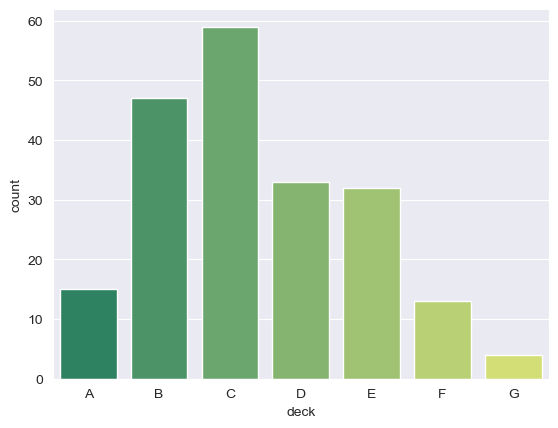

In [33]:
sns.set_style('darkgrid')
sns.countplot(x='deck',data=df,palette="summer")

<Axes: xlabel='deck', ylabel='count'>

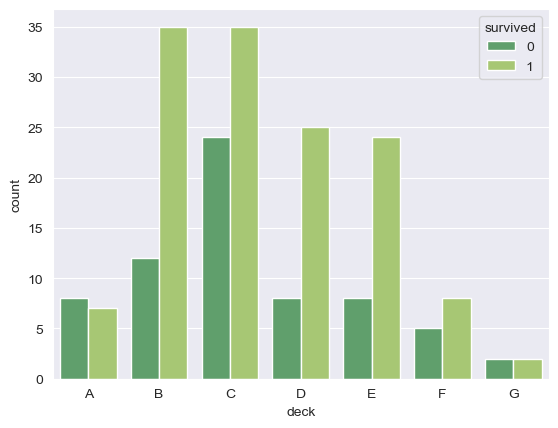

In [34]:
sns.set_style('darkgrid')
sns.countplot(x='deck',data=df,palette="summer",hue="survived")

In [37]:
# because of the missing values we can't use deck column
df.drop('deck',axis=1,inplace=True)

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<Axes: xlabel='pclass', ylabel='age'>

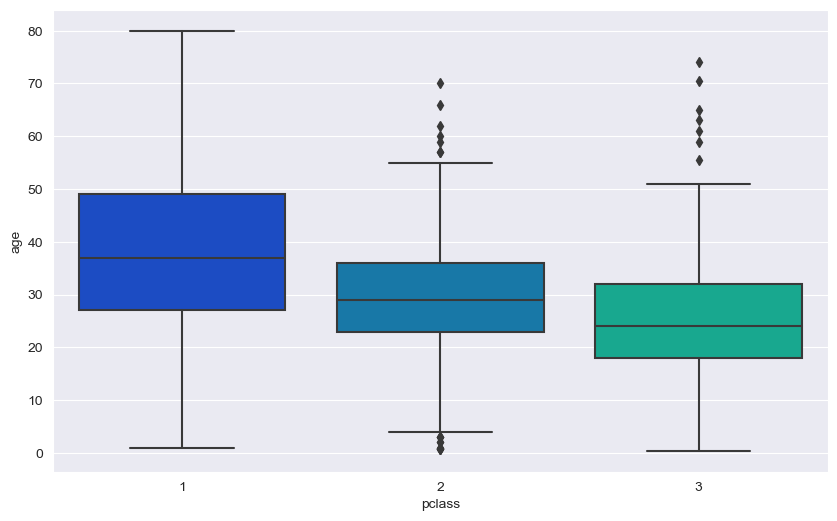

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='pclass',y='age',data=df,palette='winter')

In [40]:
# we want the age variable so we can't drop it so we will fill the missing values form the average of the pclass and compare it with the age
import pandas as pd

def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
    else:
        return age


In [41]:
df.age = df[['age','pclass']].apply(fillna_age,axis=1)

In [42]:
import pandas as pd

# Assuming df is your DataFrame

null_num = []

for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

result_df = pd.DataFrame(null_num, index=df.columns, columns=["Total Missing Values"])

print(result_df)


             Total Missing Values
survived                        0
pclass                          0
sex                             0
age                             0
sibsp                           0
parch                           0
fare                            0
who                             0
adult_male                      0
embark_town                     2
alone                           0


In [43]:
df.dropna(inplace=True)

In [44]:
import pandas as pd

# Assuming df is your DataFrame

null_num = []

for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

result_df = pd.DataFrame(null_num, index=df.columns, columns=["Total Missing Values"])

print(result_df)


             Total Missing Values
survived                        0
pclass                          0
sex                             0
age                             0
sibsp                           0
parch                           0
fare                            0
who                             0
adult_male                      0
embark_town                     0
alone                           0


<Axes: xlabel='survived', ylabel='count'>

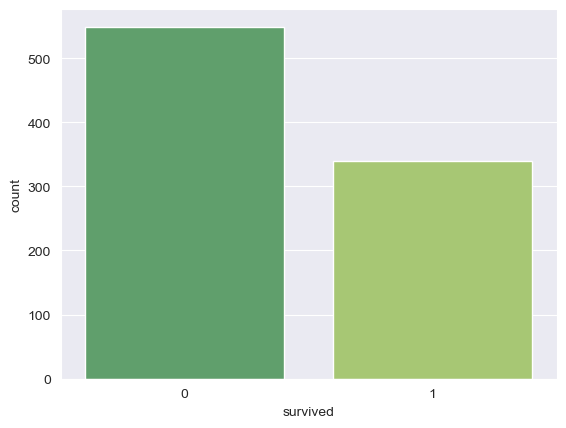

In [45]:
sns.set_style('darkgrid')
sns.countplot(x="survived",data=df,palette="summer")

In [46]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

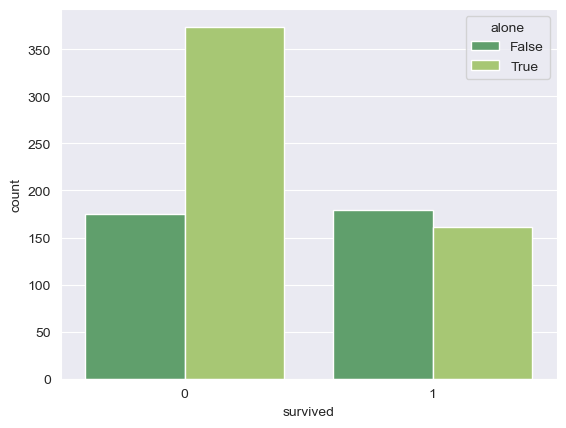

In [47]:
sns.set_style('darkgrid')
sns.countplot(x="survived",hue = "alone",data=df,palette="summer")

<Axes: xlabel='survived', ylabel='count'>

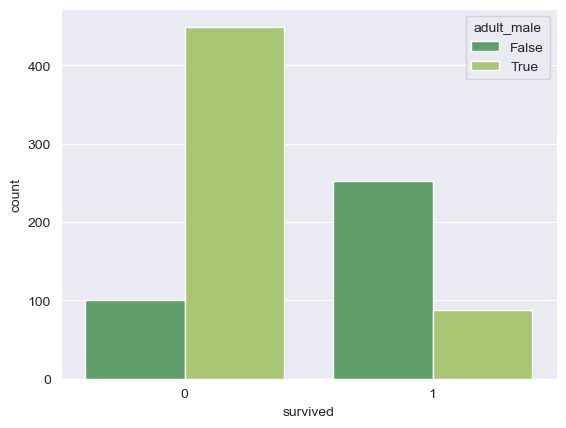

In [48]:
sns.set_style('darkgrid')
sns.countplot(x="survived",hue = "adult_male",data=df,palette="summer")

<Axes: xlabel='survived', ylabel='count'>

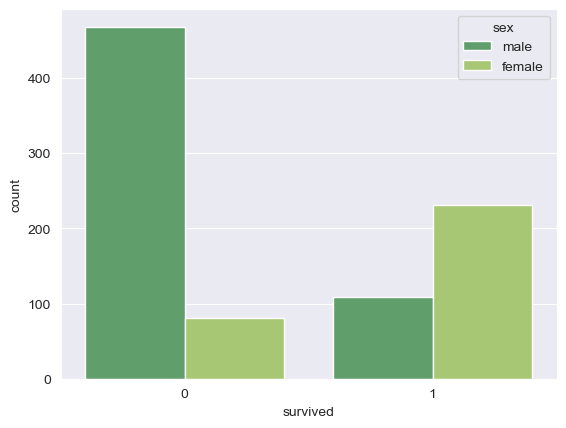

In [49]:

sns.set_style('darkgrid')
sns.countplot(x="survived",hue = "sex",data=df,palette="summer")

<Axes: xlabel='survived', ylabel='count'>

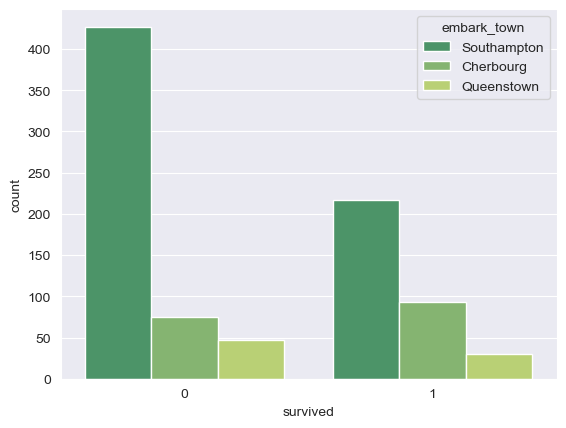

In [50]:
sns.set_style('darkgrid')
sns.countplot(x="survived",hue = "embark_town",data=df,palette="summer")

In [51]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [52]:
df.embark_town.value_counts("surived")	

embark_town
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: proportion, dtype: float64

<Figure size 1000x600 with 0 Axes>

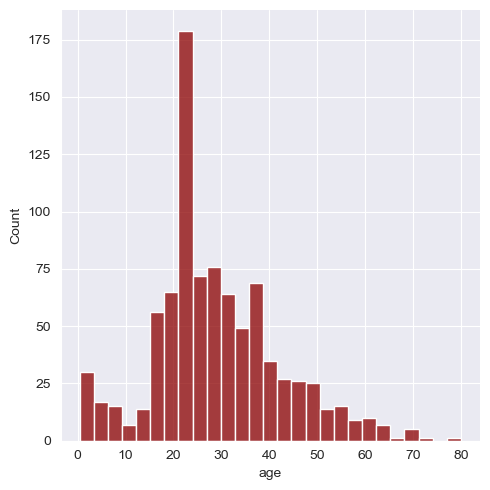

In [54]:
plt.figure(figsize=(10,6))
sns.displot(df["age"],color='darkred')

<Figure size 1000x600 with 0 Axes>

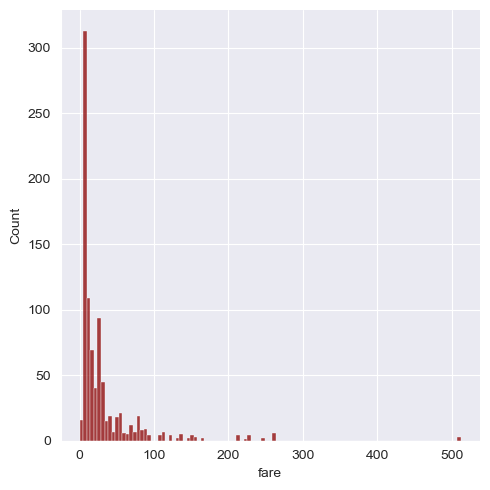

In [55]:
plt.figure(figsize=(10,6))
sns.displot(df["fare"],color='darkred')

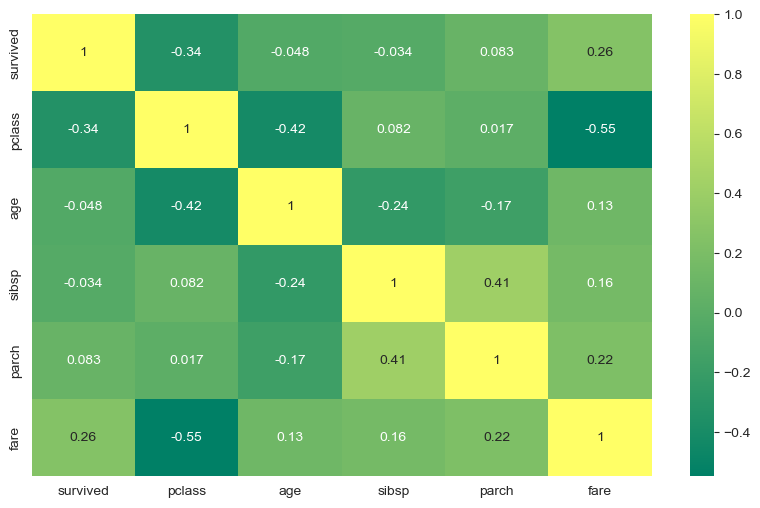

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame, you can exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='summer')
plt.show()


In [58]:
  # we can see that fare and pclass are highly correlated so we can drop one of them
# age slibsp and parch are also correlated but not that much so we can keep them

df.drop(["age","sibsp","parch"],axis=1,inplace=True)    

In [59]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


In [62]:
sex = pd.get_dummies(df["sex"],drop_first=True)
who = pd.get_dummies(df["who"],drop_first=True)
embark_town = pd.get_dummies(df["embark_town"],drop_first=True)
adult_male = pd.get_dummies(df["adult_male"],drop_first=True)
alone = pd.get_dummies(df["alone"],drop_first=True)

In [64]:
df=pd.concat([df,sex,who ,adult_male,alone,embark_town],axis=1)

In [65]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,woman,True,True,Queenstown,Southampton
0,0,3,male,7.2500,man,True,Southampton,False,True,True,False,True,False,False,True
1,1,1,female,71.2833,woman,False,Cherbourg,False,False,False,True,False,False,False,False
2,1,3,female,7.9250,woman,False,Southampton,True,False,False,True,False,True,False,True
3,1,1,female,53.1000,woman,False,Southampton,False,False,False,True,False,False,False,True
4,0,3,male,8.0500,man,True,Southampton,True,True,True,False,True,True,False,True


In [66]:
df.drop(["sex","who","adult_male","alone","embark_town"],axis=1,inplace=True)

In [67]:
df.head()

,survived,pclass,fare,male,man,woman,True,True,Queenstown,Southampton
0,0,3,7.2500,True,True,False,True,False,False,True
1,1,1,71.2833,False,False,True,False,False,False,False
2,1,3,7.9250,False,False,True,False,True,False,True
3,1,1,53.1000,False,False,True,False,False,False,True
4,0,3,8.0500,True,True,False,True,True,False,True


** Modelling ** 

In [68]:
from sklearn.model_selection import train_test_split


In [69]:
X = df.drop("survived",axis=1)
y = df["survived"]

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr_model = LogisticRegression()

In [76]:
X_train.columns = X_train.columns.astype(str)
lr_model.fit(X_train, y_train)


LogisticRegression()

In [78]:
# Convert column names to strings
X_test.columns = X_test.columns.astype(str)

# Now, you can use the lr_model.predict
y_pred = lr_model.predict(X_test)


In [79]:
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
print(confusion_matrix(y_test, y_pred))

[[134  33]
 [ 22  78]]


In [81]:
print(confusion_matrix(y_test, y_pred))

[[134  33]
 [ 22  78]]


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       167
           1       0.70      0.78      0.74       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.80       267



In [83]:
cnf_matrix = confusion_matrix(y_test, y_pred)   